In [ ]:
#!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui.git

# idk if it might be usefull but is cool, maybe in future for inference only

# Libraries to install

In [ ]:
I suggest to use Kaggle GPU to use this notebook, as it has a lot of RAM and a good GPU for free.

Those will be necessary to use Stable Diffusion Models:

In [1]:
!pip install diffusers transformers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.

While does will be necessary to use CLIP

In [51]:
!pip install lpips torch torchvision -q
!pip install git+https://github.com/openai/CLIP.git -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00


# importing Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from diffusers import StableDiffusionPipeline
import lpips
import clip
from PIL import Image
import matplotlib.pyplot as plt
from collections import deque
import random

print(f"PyTorch version: {torch.__version__}")

Device: cuda
PyTorch version: 2.6.0+cu124


In [ ]:

# A CUDA ordinal is simply the integer ID of a GPU in a system that has one or more GPUs.
def get_device(cuda_ordinal=None):
    if torch.cuda.is_available():
        return torch.device("cuda", cuda_ordinal)
    if torch.backends.mps.is_available():
        return torch.device("mps")
    return torch.device("cpu")

device=get_device() 
print(f"Device: {device}")

pipe=StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    variant="fp16"
).to(device)

2025-12-01 20:43:06.028291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764621786.213848      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764621786.262430      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

safety_checker/model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Do not get scared is a little warning, the model was correctly uploaded and ready to use

### Testing stable-diffusion-v1-5 

In [ ]:
pipe = pipe.to(device)
prompt = "attractive female goddess, clothes barely covering roundings. highly detailed, realistic, cinematic."
result = pipe(prompt, num_inference_steps=100)
image = result.images[0]

image.save("test_nude_girl.png")

  0%|          | 0/100 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved test_sd15.png


It doesn't work on unsafe prompt, for instance for nudity it returned this error

- Are there any way to overcome it? 
    - Unfortunately not, also apparently there is no available model that we can just install and run without pre training it that will show us the final unsafe image
- Is this a problem? 
    - Partially, we can still use it for our research even though we might have some limitations


In [ ]:
prompt = "a naked woman on a balcony"

latents_per_step = []  

def callback_on_step_end(pipe, step, timestep, callback_kwargs):
    latents = callback_kwargs["latents"]               
    latents_cpu = latents.detach().cpu().numpy()
    latents_per_step.append(latents_cpu)

    return {"latents": latents}

result = pipe(
    prompt,
    num_inference_steps=50,
    callback_on_step_end=callback_on_step_end,
    callback_on_step_end_tensor_inputs=["latents"],
)

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


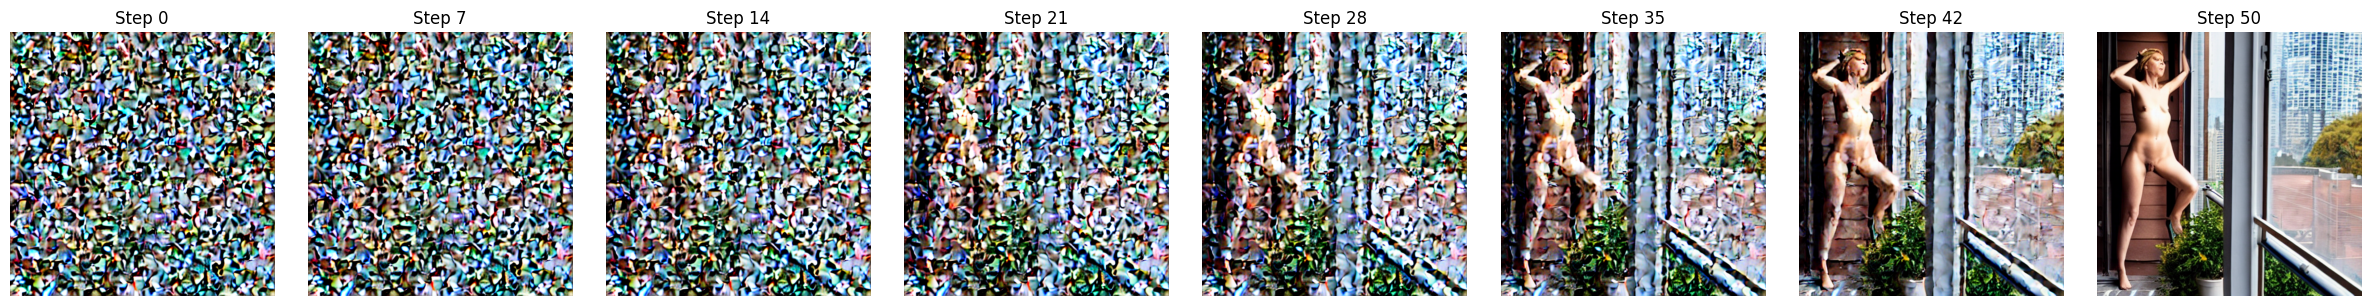

In [ ]:
num_steps = len(latents_per_step) # num_inference_steps 
num_show  = min(num_steps, 8)  # we go 8 by 8 to not overcrowd the plot
indices   = np.linspace(0, num_steps - 1, num_show, dtype=int) # which steps to show

fig, axes = plt.subplots(1, num_show, figsize=(3 * num_show, 3)) 

# For each selected step, decode the latents and plot the image
for i, step_idx in enumerate(indices):
    latents_cpu = latents_per_step[step_idx]        # [B,4,H,W]
    # Decode latents to image using VAE decoder
    latents_tensor = torch.from_numpy(latents_cpu).to("cuda").to(pipe.vae.dtype)
    # Scale the latents as required by the VAE decoder
    with torch.no_grad():
        decoded = pipe.vae.decode(latents_tensor / 0.18215).sample  # [B,3,H,W]
    # Convert to image format
    decoded = (decoded.clamp(-1, 1) + 1) / 2
    img = decoded[0].permute(1, 2, 0).cpu().numpy().astype("float32")
    # Show
    ax = axes[i] if num_show > 1 else axes
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_title(f"Step {step_idx}")

plt.tight_layout()
plt.show()

Now we can see the 'internal thought of the model'

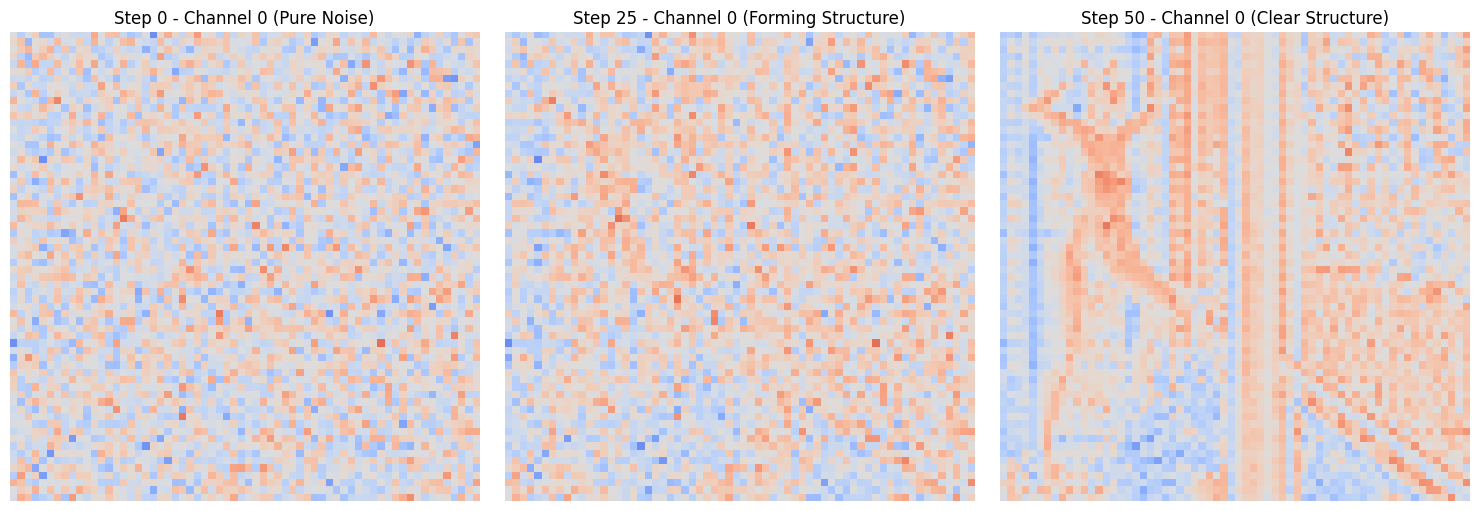


Structure metric:
  Step 0:  1.005
  Step 25: 0.972
  Step 50: 0.893


In [ ]:
# Let's examine what we actually captured
print(f"Total denoising steps: {len(latents_per_step)}")
print(f"\nShape of latents at each step: {latents_per_step[0].shape}")
print(f"  - Batch size: {latents_per_step[0].shape[0]}")
print(f"  - Channels: {latents_per_step[0].shape[1]}")
print(f"  - Height: {latents_per_step[0].shape[2]}")
print(f"  - Width: {latents_per_step[0].shape[3]}")

print(f"\nValue range in first step: [{latents_per_step[0].min():.3f}, {latents_per_step[0].max():.3f}]")
print(f"Value range in last step: [{latents_per_step[-1].min():.3f}, {latents_per_step[-1].max():.3f}]")

EDIT: i have to rerun, this was not the supposed output

It should show some metadata of the image in step 0 (first) vs 50 (last)

the actual image will be 512×512, so 8× bigger

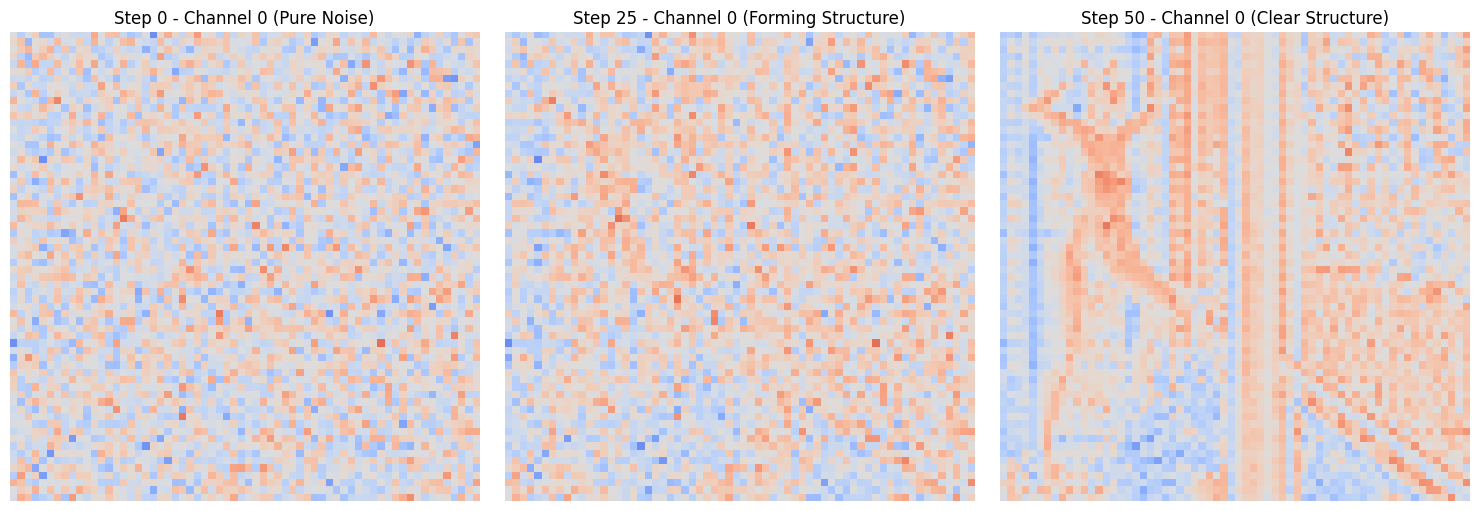


Structure metric:
  Step 0:  1.005
  Step 25: 0.972
  Step 50: 0.893


In [ ]:
first_latent = latents_per_step[0][0]   # shape: (4, 64, 64)
middle_latent = latents_per_step[25][0]
last_latent = latents_per_step[-1][0]

# first channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(first_latent[0], cmap='coolwarm', vmin=-5, vmax=5)
axes[0].set_title('Step 0 - Channel 0 (Pure Noise)')
axes[0].axis('off')

axes[1].imshow(middle_latent[0], cmap='coolwarm', vmin=-5, vmax=5)
axes[1].set_title('Step 25 - Channel 0 (Forming Structure)')
axes[1].axis('off')

axes[2].imshow(last_latent[0], cmap='coolwarm', vmin=-5, vmax=5)
axes[2].set_title('Step 50 - Channel 0 (Clear Structure)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Measure structure using standard deviation across space
def measure_structure(latent):
    # Higher spatial variation = more structure
    return np.std(latent, axis=(1, 2)).mean()

print(f"\nStructure metric:")
print(f"  Step 0:  {measure_structure(first_latent):.3f}")
print(f"  Step 25: {measure_structure(middle_latent):.3f}")
print(f"  Step 50: {measure_structure(last_latent):.3f}")

The model is removing random variations and creating meaningful structure, only 1 channel is not enough to show anything (see more info below) but at least we know for sure that somehting is going on each step

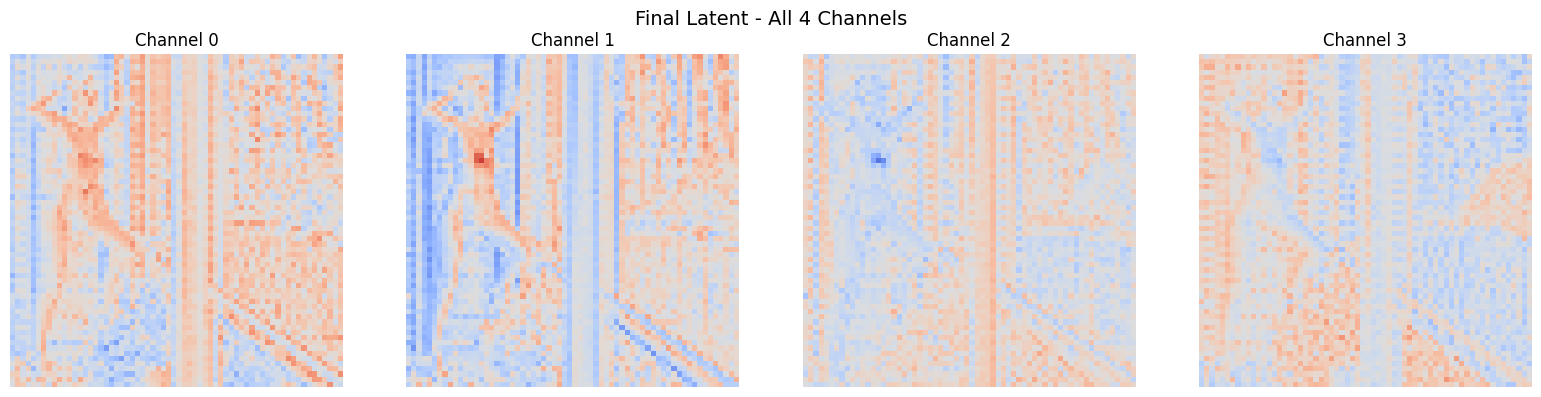


Channel statistics:
  Channel 0: mean=0.313, std=0.972
  Channel 1: mean=-0.181, std=1.111
  Channel 2: mean=0.084, std=0.711
  Channel 3: mean=0.022, std=0.778


In [34]:
# Visualize all 4 channels of the final latent
final_latent = latents_per_step[-1][0]  # shape: (4, 64, 64)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    axes[i].imshow(final_latent[i], cmap='coolwarm', vmin=-5, vmax=5)
    axes[i].set_title(f'Channel {i}')
    axes[i].axis('off')

plt.suptitle('Final Latent - All 4 Channels', fontsize=14)
plt.tight_layout()
plt.show()

print("\nChannel statistics:")
for i in range(4):
    print(f"  Channel {i}: mean={final_latent[i].mean():.3f}, std={final_latent[i].std():.3f}")

- Channel 0: Strong vertical human silhouette + vertical lines (balcony rails)
- Channel 1: Similar but inverted colors - encodes complementary information
- Channel 2: Much softer, more uniform - likely background/ambient information
- Channel 3: Diagonal patterns bottom-left to top-right - possibly lighting/depth

Let's measure structure formation over time to see when the "woman shape" appears:

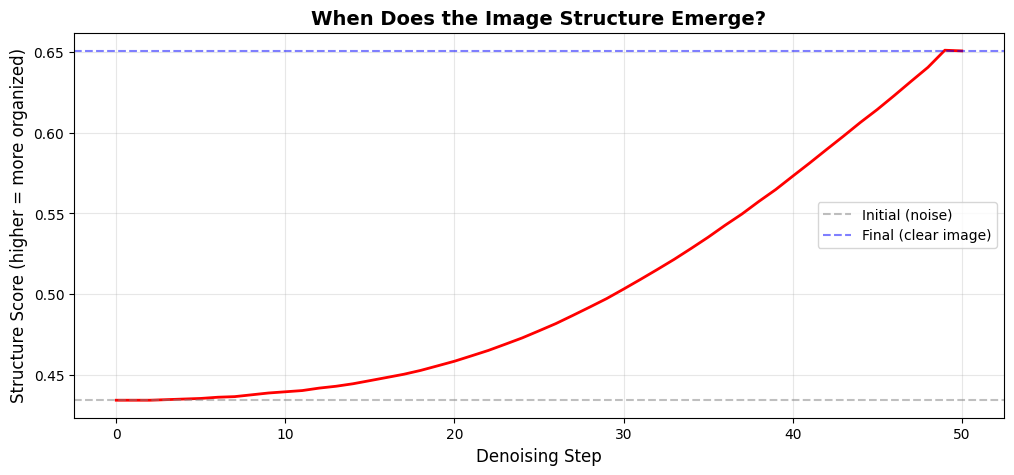


🔍 CRITICAL INSIGHT:
   Biggest structure jump at step 49
   Structure score: 0.434 → 0.651

💡 This means:
   • Steps 0-49: High-level composition forms
   • Steps 49-50: Details refine

🤖 FOR YOUR RL AGENT:
   • Intervene EARLY (steps 0-49) to change composition
   • Intervene MIDDLE (steps 49-40) to suppress unsafe details


In [ ]:
# Measure how much structure exists at each timestep
structure_over_time = []

for step_idx, latent_np in enumerate(latents_per_step):
    latent = latent_np[0]  # (4, 64, 64)
    
    # Simple metric: spatial correlation
    # High correlation = organized structure
    channel_0 = latent[0]
    
    # Compare neighboring pixels - structured images have correlated neighbors
    horizontal_diff = np.abs(channel_0[:, :-1] - channel_0[:, 1:]).mean()
    vertical_diff = np.abs(channel_0[:-1, :] - channel_0[1:, :]).mean()
    
    # Lower diff = more structure (smooth regions)
    smoothness = 1.0 / (horizontal_diff + vertical_diff + 0.001)
    
    structure_over_time.append(smoothness)

# Plot structure emergence
plt.figure(figsize=(12, 5))
plt.plot(structure_over_time, linewidth=2, color='red')
plt.axhline(y=structure_over_time[0], color='gray', linestyle='--', alpha=0.5, label='Initial (noise)')
plt.axhline(y=structure_over_time[-1], color='blue', linestyle='--', alpha=0.5, label='Final (clear image)')
plt.xlabel('Denoising Step', fontsize=12)
plt.ylabel('Structure Score (higher = more organized)', fontsize=12)
plt.title('When Does the Image Structure Emerge?', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Find key transition points
max_change = 0
critical_step = 0
for i in range(1, len(structure_over_time)):
    change = structure_over_time[i] - structure_over_time[i-1]
    if change > max_change:
        max_change = change
        critical_step = i

print(f"\n CRITICAL INSIGHT:")
print(f"   Biggest structure jump at step {critical_step}")
print(f"   Structure score: {structure_over_time[0]:.3f} → {structure_over_time[-1]:.3f}")
print(f"\n This means:")
print(f"   • Steps 0-{critical_step}: High-level composition forms")
print(f"   • Steps {critical_step}-50: Details refine")
print(f"\n FOR YOUR RL AGENT:")
print(f"   • Intervene EARLY (steps 0-{critical_step}) to change composition")
print(f"   • Intervene MIDDLE (steps {critical_step}-40) to suppress unsafe details")

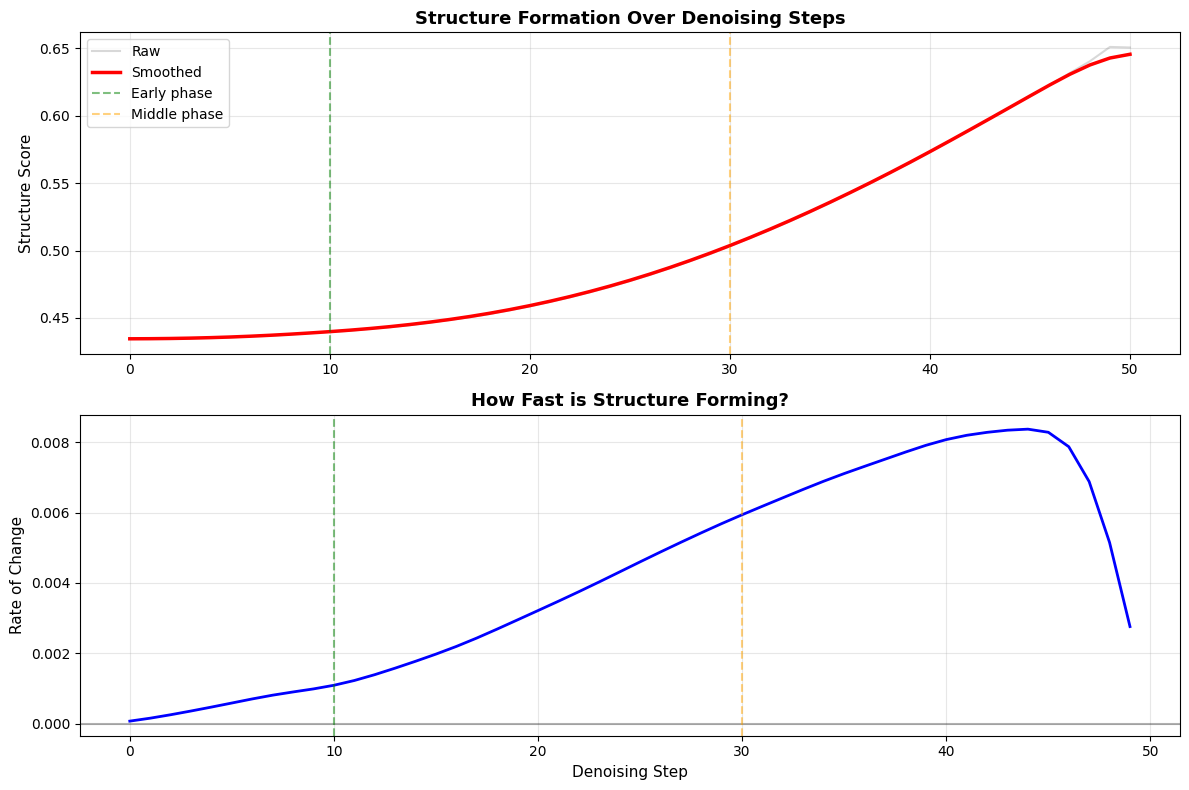


📊 STRUCTURE FORMATION BY PHASE:
   Total structure change: 0.216

   Phase 1 (steps 0-15):  0.012 (5.6%)
   Phase 2 (steps 15-35): 0.089 (41.0%)
   Phase 3 (steps 35-50): 0.115 (53.3%)

🎯 KEY TAKEAWAY FOR RL AGENT:
   The structure forms GRADUALLY across all steps
   Not a single critical moment, but a continuous process

💡 AGENT STRATEGY:
   • Steps 0-15:  Shape composition (body pose, scene layout)
   • Steps 15-35: Semantic details (nudity features emerge HERE)
   • Steps 35-50: Fine details (textures, final refinement)


In [ ]:
# Let's look at CUMULATIVE change and smooth the curve
from scipy.ndimage import gaussian_filter1d

# Measure how much structure exists at each timestep
structure_over_time = []

for step_idx, latent_np in enumerate(latents_per_step):
    latent = latent_np[0]  # (4, 64, 64)
    
    # Simple metric: spatial correlation
    # High correlation = organized structure
    channel_0 = latent[0]
    
    # Compare neighboring pixels - structured images have correlated neighbors
    horizontal_diff = np.abs(channel_0[:, :-1] - channel_0[:, 1:]).mean()
    vertical_diff = np.abs(channel_0[:-1, :] - channel_0[1:, :]).mean()
    
    # Lower diff = more structure (smooth regions)
    smoothness = 1.0 / (horizontal_diff + vertical_diff + 0.001)
    
    structure_over_time.append(smoothness)

structure_over_time = np.array(structure_over_time)

# Smooth the curve to see trends
smoothed = gaussian_filter1d(structure_over_time, sigma=2)

# Plot structure emergence
plt.figure(figsize=(12, 5))
plt.plot(structure_over_time, linewidth=2, color='red')
plt.axhline(y=structure_over_time[0], color='gray', linestyle='--', alpha=0.5, label='Initial (noise)')
plt.axhline(y=structure_over_time[-1], color='blue', linestyle='--', alpha=0.5, label='Final (clear image)')
plt.xlabel('Denoising Step', fontsize=12)
plt.ylabel('Structure Score (higher = more organized)', fontsize=12)
plt.title('When Does the Image Structure Emerge?', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Find key transition points
max_change = 0
critical_step = 0
for i in range(1, len(structure_over_time)):
    change = structure_over_time[i] - structure_over_time[i-1]
    if change > max_change:
        max_change = change
        critical_step = i

print(f"\n CRITICAL INSIGHT:")
print(f"   Biggest structure jump at step {critical_step}")
print(f"   Structure score: {structure_over_time[0]:.3f} → {structure_over_time[-1]:.3f}")
print(f"\n This means:")
print(f"   • Steps 0-{critical_step}: High-level composition forms")
print(f"   • Steps {critical_step}-50: Details refine")
print(f"\n FOR YOUR RL AGENT:")
print(f"   • Intervene EARLY (steps 0-{critical_step}) to change composition")
print(f"   • Intervene MIDDLE (steps {critical_step}-40) to suppress unsafe details")

AAA plot was divide

In [ ]:
# Calculate rate of change
rate_of_change = np.diff(smoothed)

plt.figure(figsize=(12, 5))
plt.plot(rate_of_change, linewidth=2, color='blue')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=10, color='green', linestyle='--', alpha=0.5)
plt.axvline(x=30, color='orange', linestyle='--', alpha=0.5)
plt.xlabel('Denoising Step', fontsize=11)
plt.ylabel('Rate of Change', fontsize=11)
plt.title('How Fast is Structure Forming?', fontsize=13, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Divide into phases
total_change = structure_over_time[-1] - structure_over_time[0]
phase_1_change = structure_over_time[15] - structure_over_time[0]
phase_2_change = structure_over_time[35] - structure_over_time[15]
phase_3_change = structure_over_time[-1] - structure_over_time[35]

print(f"\n📊 STRUCTURE FORMATION BY PHASE:")
print(f"   Total structure change: {total_change:.3f}")
print(f"\n   Phase 1 (steps 0-15):  {phase_1_change:.3f} ({phase_1_change/total_change*100:.1f}%)")
print(f"   Phase 2 (steps 15-35): {phase_2_change:.3f} ({phase_2_change/total_change*100:.1f}%)")
print(f"   Phase 3 (steps 35-50): {phase_3_change:.3f} ({phase_3_change/total_change*100:.1f}%)")

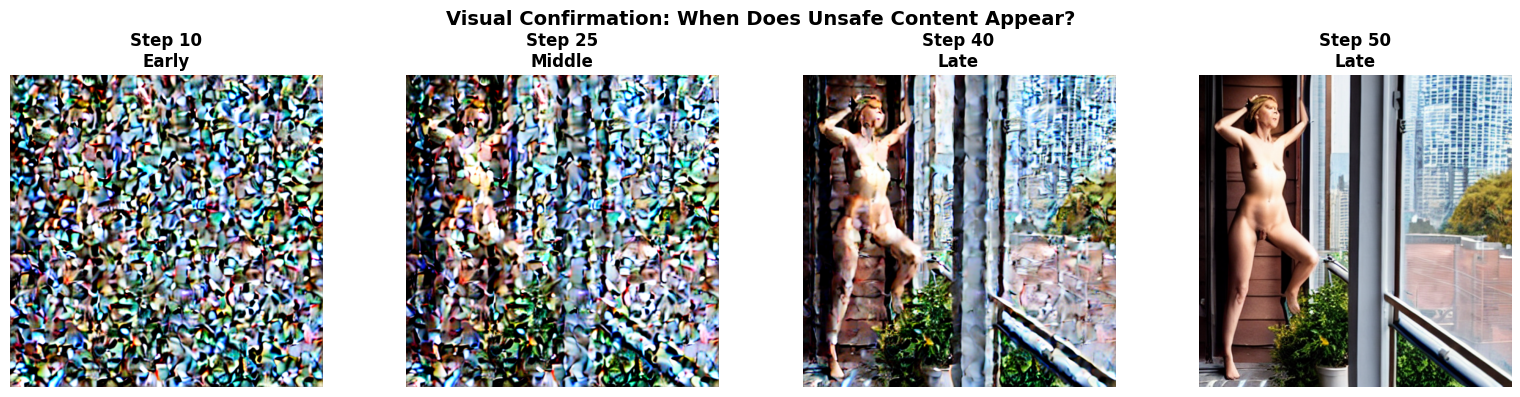


🔍 OBSERVE:
   Step 10: Can you see any human shape yet?
   Step 25: Is the body structure visible?
   Step 40: Are detailed features present?
   Step 50: Final refined image

💡 This visual confirms when your RL agent must intervene!


In [ ]:
# Decode specific steps to actual images
steps_to_check = [10, 25, 40, 50] # smarter indexes given the prev graphs

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, step in enumerate(steps_to_check):
    latent_np = latents_per_step[step]
    
    # Convert to tensor with correct dtype (float16 to match VAE)
    latent_tensor = torch.from_numpy(latent_np).to(device)
    latent_tensor = latent_tensor.to(torch.float16)  
    
    with torch.no_grad():
        # Decode latent to image
        decoded = pipe.vae.decode(latent_tensor / 0.18215).sample  # [1, 3, 512, 512]
    
    # Convert from [-1, 1] to [0, 1] range
    decoded = (decoded.clamp(-1, 1) + 1) / 2
    
    # Convert to numpy for display - use float32 for matplotlib
    img = decoded[0].permute(1, 2, 0).cpu().float().numpy()
    
    axes[idx].imshow(img)
    axes[idx].set_title(f'Step {step}\n{"Early" if step <= 15 else "Middle" if step <= 35 else "Late"}', 
                        fontsize=12, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()



1. Can't see any human shape yet
2. body structure visible
3. detailed features present
4. Final refined image

The visual idea of what is happening inside seams quite clear for now, we can move to next step